<a href="https://colab.research.google.com/github/DavidSenseman/STA1403/blob/master/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **STA1403: "Biostats"**

### **Assignment 9: Regression**

#### In this assignment you will learn about:

* Simple linear regression
* Line-of-best-fit (regression line)
* Multiple linear regression (no interactions)
* Multiple linear regression (with interactions)


### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [ ]:
# You must run this cell second
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

## **Regression Analysis**

In this lesson you will learn how to use Python to perform simple and multiple linear regressions. In a previous assignment we discussed how to test a hypothesis regarding the relationship betweeen a binary explanatory variable and a numerical response variable using a two-sample _t_-test. We also discussed situations where we investigate the linear relationship between two numerical variables (e.g., percent body fat and abdomen circumference). In this case, we typically consider one of the two numerical variables (e.g., percent body fat) as the response (or target) variable and the other one (e.g., abdomen circumference) as the explanatory variable. The common theme for both methods is that we investigate the relationship between an explanatory variable (either categorical or numerical) and a numerical random variable.

In this assignment, we discuss an alternative approach for analyzing such problems. This approach use linear regression models for either testing a hypothesis regarding the relationship between one or more explanatory variables and a response variable, or predicting unknown values of the response variable using one or more predictors. Note that we use the terms “explanatory variables” and “predictors” to distinguish the role of variables (other than the response variable) in the model.


### Data File

In Assignment 09 we will be using the Birth Weight dataset, to explore some of the different ways to perform a **_regression_** analysis. We have used this dataset before so you should already be familiar with it.


### Data Description

The dataset contains data from 189 women who gave birth to a baby at the Baystate Medical Center. For each woman, the following 10 datapoints were recorded:

* _low_   indicator of birth weight less than 2.5 kg.
* _age_   mother's age in years.
* _lwt_   mother's weight in pounds at last menstrual period.
* _race_  other's race (1 = white, 2 = black, 3 = other).
* _smoke_ smoking status during pregnancy.
* _ptl_   number of previous premature labours.
* _ht_    history of hypertension.
* _ui_    presence of uterine irritability.
* _ftv_   number of physician visits during the first trimester.
* _bwt_   birth weight in grams.



### Read datafile from the internet.

We will use the Pandas function `pd.read_csv()` function to read the data from the course file server, `biologicslab.co`. In this text file, data values are separated by a space. Therefore, we have to add the argument `sep=' '` as shown in the cell below. As the data is stored in a DataFrame called `bwDF`.

After reading in the data, we use the `head()` function to print out the first 5 records to make sure our code worked as expected.

In [2]:
# Read in the data

import pandas as pd

# Read data file
bwDF = pd.read_csv("https://biologicslab.co/STA1403/data/birthwt.txt",
                   sep=' ')  # define the separator as a space

# Print out the first 6 values.
bwDF.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A08/A08_Image03.png)

You can see the first 6 rows of data in the `birthWt_df` dataframe contain both categorical data and numerical data. The three numerical categories (columns) are `age`, `lwt` and `bwt`. The remaining columns are all categorical.

### Example 1: Simple Linear Regression

The code in the cell below uses the Statsmodel `OLS()` function to perform a simple linear regression. The function `OLS()` stands for **_Ordinary Linear Squares_**.

The Ordinary Least Squares (OLS) method is a fundamental technique in linear regression analysis used to estimate the parameters of a linear model. OLS aims to find the best-fitting line (or hyperplane in higher dimensions) through a set of data points by minimizing the sum of the squared differences (residuals) between the observed values and the values predicted by the linear model.

**Key Concepts**
1. _Linear Regression Model:_ The model assumes a linear relationship between the dependent variable ( y ) and one or more independent variables ( X ). The general form is:

> $     y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \epsilon $


where ($ \beta_0$ ) is the intercept, ( $\beta_1, \beta_2, \ldots, \beta_n$ ) are the coefficients, and ( $ \epsilon $ ) is the error term.


2. _Residuals:_ The differences between the observed values ($ y_i $ ) and the predicted values ( $\hat{y}_i $). Residuals are given by:

> $ \epsilon_i = y_i - \hat{y}_i  $


3. _Objective:_ Minimize the sum of the squared residuals:

> $ \text{Minimize} \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $


Why Minimize Squared Residuals?
Minimizing the squared residuals ensures that the model is as close as possible to the actual data points, reducing the overall error. Squaring the residuals also penalizes larger errors more heavily, leading to a more accurate model.

**Properties of OLS**

* _Unbiased Estimates:_ Under certain conditions (e.g., linearity, independence, homoscedasticity), OLS provides unbiased estimates of the coefficients.
* _Efficiency:_ OLS estimates have the smallest variance among all unbiased linear estimators (Gauss-Markov theorem).
* _Simplicity:_ The method is computationally straightforward and widely used in practice.

In Example 1, we are asking whether differences in maternal age are associated with differences in birthweight. In other words, do the babies of older mothers weight more, or less, than the babies of younger mothers? In this situation, the mother's age is the **independent variable** and by convention, we assign it to the letter `X`. The baby's weight is the **dependent variable**, and we assign it to the letter `y`.

We generate what is known as a **linear model** called `model_Eg1` using this line of code:

> `model_Eg1 = sm.OLS(y, X).fit()`

and then print out a summary of the results.

In [3]:
# Example 1: Simple Linear Regression

import statsmodels.api as sm
import pandas as pd

# Add a constant to the model (intercept)
bwDF['const'] = 1

# Define X and y
X = bwDF[['const', 'age']]
y = bwDF['bwt']

# Generate the model
model_Eg1 = sm.OLS(y, X).fit()

# Print the summary
print(model_Eg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.523
Date:                Wed, 23 Oct 2024   Prob (F-statistic):              0.219
Time:                        15:29:09   Log-Likelihood:                -1512.7
No. Observations:                 189   AIC:                             3029.
Df Residuals:                     187   BIC:                             3036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2657.3326    238.804     11.128      0.0

If the code is correct, you should see the following output:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.523
Date:                Fri, 19 Jul 2024   Prob (F-statistic):              0.219
Time:                        14:15:27   Log-Likelihood:                -1512.7
No. Observations:                 189   AIC:                             3029.
Df Residuals:                     187   BIC:                             3036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2657.3326    238.804     11.128      0.000    2186.236    3128.429
age           12.3643     10.021      1.234      0.219      -7.404      32.132
==============================================================================
Omnibus:                        2.797   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.707
Skew:                          -0.292   Prob(JB):                        0.258
Kurtosis:                       2.953   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~


### Interpretation of the Results

As you can see, the function `sm.OLS()` generates a number of different results. For now we will focus on the statistical significance of the two _p_ -values.

These _p_ -values are shown under the column titled `Pr(>|t|)`. The first _p_ -value, `0.000`. This means that the p-value is some value _smaller_ that `0.000` and is therefore, highly significant. This first p-value simply inicates that the value of the **_intercept_** for the linear model is very unlikely to be zero. Since we set the intercept to be `1`, we can ignore this result.

Of much more interest is the second _p_ -value, `0.219`. This is the p-value that a mother's age (`age`) is related to her baby's birth weight (`bwt`). Since p-value is much greater that `0.05`, we have no reason to think that the mother's age is somehow related to the birth weight of her baby.

More formally, given the _p_ -value of 0.219, there is no reason to reject the null hypothesis, _H_<sub>0</sub>: , that maternal age and the baby's birth weight are independent of each other.  

### **Exercise 1: Perform a Simple Linear Regression**

In the code cell below, write the Python code to perform a simple linear regression of the baby's birth weight (`bwt`) as a function of the mother's smoking behavior (`smoke`). Call the output of your model `model_Ex1` and print out a summary of the results.

In [ ]:
# Insert your code for Exercise 1 here



If the code is correct, you should see the following output:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.936
Date:                Fri, 19 Jul 2024   Prob (F-statistic):            0.00916
Time:                        14:22:31   Log-Likelihood:                -1510.1
No. Observations:                 189   AIC:                             3024.
Df Residuals:                     187   BIC:                             3031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3054.9565     66.933     45.642      0.000    2922.915    3186.998
smoke       -281.7133    106.969     -2.634      0.009    -492.734     -70.693
==============================================================================
Omnibus:                        2.742   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.676
Skew:                          -0.290   Prob(JB):                        0.262
Kurtosis:                       2.936   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~


### Interpretation of the Results

You should be able to look at the result summary above and decide if maternal smoking behavior was significantly related to the birth weight of the mother's baby.

### Example 2: Generate a Dot Plot with a Regression Line

When performing a simple linear regression -- with one numerical response variable and one categorical or numerical predictor, it is all advisable to produce a **_dot plot_** of the data.

In this example, we use Matplotlib pyplot function to generate the dot plot with this line of code:

> `plt.scatter(bwDF['age'], bwDF['bwt'], alpha=0.5)`

In order to add a regression line (line-of-best-fit), we generate the OLS model, `model_Eg1` and use the `fittedvalues()` method to provide the x, y co:ordinates for plotting the line.

> `plt.plot(bwDF['age'], model_Eg1.fittedvalues, color='red')`



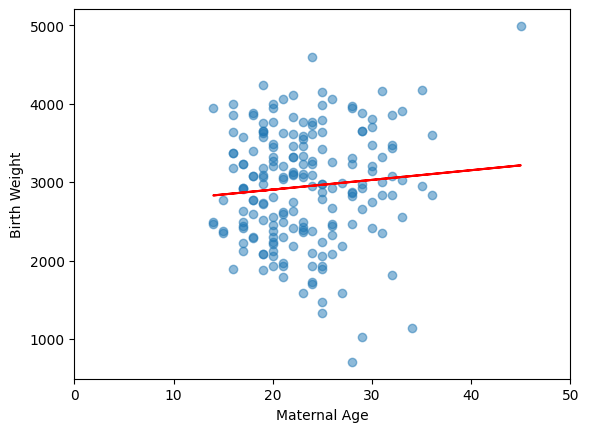

In [4]:
# Example 2: Dot Plot with Regrssion Line

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate dot plot
plt.scatter(bwDF['age'], bwDF['bwt'], alpha=0.5)
plt.xlabel('Maternal Age')
plt.ylabel('Birth Weight')
plt.xlim(0, 50)

# Generate the model
model_Eg1 = smf.ols('bwt ~ age', data=bwDF).fit()

# Add line of best fit
plt.plot(bwDF['age'], model_Eg1.fittedvalues, color='red')

# Show plot
plt.show()

If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A08/A08_Image04.png)

### Interpretation of the Dot Plot

By visual inspection of the dot plot, you can see that there isn't any clear relationship between the birth weight of the baby and the mother's age. The dots are basically in the shape of a circular cloud. This makes sense, since the linear regression of these data in Example 1 did _not_ find a statistically significant relationship between maternal age and birth weight.

### **Exercise 2: Generate a Dot Plot with a Regression Line**

In the cell below, write the Python code to generate a dot plot showing the relationship between birth weight as a function of the maternal smoking behavior. Your graph should include a line of best fit and be appropiately labelled. You will also need to change the argument `xlim()` to be between -0.1 and 1.1. This change is necessary since maternal smoking behavior is a **_categorical_** value that only takes on values of either 0 or 1.

In [ ]:
# Insert your code for Exercise 2 here



If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A08/A08_Image05.png)

### Interpretation of the Dot Plot

In this instance the dot plot looks very different than the one generated above in Example 2. The reason is that the predictor, maternal smoking behavior `smoke` is a categorical variable, with only two possible values, `0` and `1`.

In this instance, it's not clear from visual inspection, whether there is a significant relationship between birth weight and whether the baby's mother smoked. What we are really asking is whether the **_mean_** birth weight is different for non-smoking `0`, and smoking mothers `1`.

Based on the results from the linear regression performed in Exercise 1, the data supports the notion that smoking behavior and birth weight are **not** independent. This graph shows that on average, the birth weight of babies from non-smoking mothers is **_higher_** compared to babies from mothers who did smoke.

### Example 3: Perform a Multiple Linear Regression (with no interactions)

In Example 1 and Exercise 1, we were asking the question whether our numerical reponse variable, birth weight, was dependent upon a single predictor variable, either maternal age (Example 1) or maternal smoking behavior (Exercise 1). In real experimental situations, linear regression is usually performed using several or even a large number of predictor variables at the same time.

When the number of predictor variables is greater than 1, the procedure is called **_multiple_** linear regression. From a computation perspective, the coding is essentially the same as will be shown in this example.

When more than one predictor variables are used, we can write our code to ask whether an **_interaction_** exists between the two (or more) of the predictor variables and the response variable. In Example 4, we will demonstrate how to code for such interactions. Here will limit ourselves to no interactions.

In Example 4, we will be looking at the possible effects of maternal age (`age`), uterine irritability (`ui`) and a history of hypertension (`ht`) on birth weight.

In [5]:
# Example 3: Multiple Regression, no interactions

import statsmodels.api as sm
import pandas as pd

# Assign X and y
X = bwDF[['age', 'ui', 'ht']]
X = sm.add_constant(X)  # Add constant term to predictor
y = bwDF['bwt']

# Generate the model
model_Eg3 = sm.OLS(y, X).fit()

# Print out a summary of the results
print(model_Eg3.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     8.105
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           4.23e-05
Time:                        15:29:39   Log-Likelihood:                -1501.8
No. Observations:                 189   AIC:                             3012.
Df Residuals:                     185   BIC:                             3025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2861.7937    230.689     12.405      0.0

If the code is correct, you should see the following summary table:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     8.105
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           4.23e-05
Time:                        20:14:43   Log-Likelihood:                -1501.8
No. Observations:                 189   AIC:                             3012.
Df Residuals:                     185   BIC:                             3025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2861.7937    230.689     12.405      0.000    2406.675    3316.912
age            8.8977      9.540      0.933      0.352      -9.923      27.718
ui          -609.6572    142.737     -4.271      0.000    -891.260    -328.055
ht          -528.9498    207.385     -2.551      0.012    -938.093    -119.807
==============================================================================
Omnibus:                        2.680   Durbin-Watson:                   0.379
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.053
Skew:                          -0.094   Prob(JB):                        0.358
Kurtosis:                       2.526   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~


### Interpretation of the Results

As before, we are primarily interested in the _p_ -values associated with the different predictor variables. Again, the _p_ -value for maternal age, `0.3522` much larger than the 95% confidence interval (0.05), so there is no reason to suspect maternal age is important in determining a baby's birth weight.

On the other hand, the predictor _uterine irritability_ `ui`, has a _p_ -value of `0.000`. This means the actual p-value is less than `0.00049999`. Whatever the p-value is, it is very much smaller than our cutoff of `0.05`.  Therefore, the data suggests that birth weight is somehow related the presence, or absence of uterine irritability.

Finally, the third predictor, hypertension `ht` has a _p_ -value of `0.0116` which is also smaller than 0.05. This indicates that both hypertension _and_ uterine irritability are somehow related to birth weight.

**IMPORTANT NOTE:** When interpreting regression data, it is natural, but **_wrong_** to assume to a significant _p_ -value automatically means there is a **_causal relationship_** between the response variable and the predictor. This temptation **_must be avoided!_**. Always repeat to yourself the mantra

> _Correlation is NOT Causation_

> _Correlation is NOT Causation_

> _Correlation is NOT Causation_

> _Correlation is NOT Causation_

If you want to actually show **_causation_** you will need to perform additional experiments. Statistical procedures, like regression analysis, only tell you which predictors **_might_** be responsible. Controlled experiments are necessary to show causality.  

### **Exercise 3: Perform a Multiple Linear Regression (with no interactions)**

In the cell below, write the Python code to perform a multiple linear regression with birth weight `bwt` as the response variable, and the following predictors: maternal smoking behavior (`smoke`), mother's race (`race`) and the number of premature labors (`ptl`). Call the output of your model `model_Ex3` and print out a summary.

In [ ]:
# Insert your code for Exercise 3 here



In your code is correct, you should see the following summary table:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     8.600
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           2.25e-05
Time:                        20:23:22   Log-Likelihood:                -1501.2
No. Observations:                 189   AIC:                             3010.
Df Residuals:                     185   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3548.9231    137.718     25.769      0.000    3277.223    3820.623
smoke       -397.4627    111.361     -3.569      0.000    -617.163    -177.762
race        -226.9185     58.294     -3.893      0.000    -341.924    -111.913
ptl         -151.3422    103.930     -1.456      0.147    -356.382      53.698
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   0.376
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.465
Skew:                          -0.275   Prob(JB):                        0.292
Kurtosis:                       2.893   Cond. No.                         7.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~


### Interpretation of the Results

You should be able to look at this table and determine which of the independent variables where significantly correlated with low birth weights and which ones were not.

### Example 4: Perform a Multiple Linear Regression (with interactions)

In Example 3 we performed a multiple linear regression between the response variable, birth weight `bwt` and three predictors, `age`, `ui` and `ht`. In this example, we extend our analysis to include **_interactions_** that might occur between predictors.

An interaction occurs when an predictor variable has a different effect on the response variable depending on the values of another predictor variable. In this example we will look at the possibility of an interaction between the predictor variables, mother's age (`age`) and a history hypertension (`ht`).

To do this we create a new independent variable by multiplying together the two independent variables that we want to test for an interaction. For example, here is the code to create the interaction between maternal age and a history of hypertension:

> `bwDF['age_ht'] = bwDF['age'] * bwDF['ht']`

To tell the function `sm.OLS()` that we want to look for a possible interaction, we simply add the interaction term along with the other independent variables.

In [6]:
# Example 4: Multiple Linear Regression with interactions

import statsmodels.api as sm
import pandas as pd

# Create interaction term
bwDF['age_ht'] = bwDF['age'] * bwDF['ht']

# Define the predictors and response variable
X = bwDF[['age', 'ht', 'age_ht']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = bwDF['bwt']

# Generate the model
model_Eg4 = sm.OLS(y, X).fit()

# Print out a summary of the results
print(model_Eg4.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.264
Date:                Wed, 23 Oct 2024   Prob (F-statistic):            0.00612
Time:                        15:29:57   Log-Likelihood:                -1507.2
No. Observations:                 189   AIC:                             3022.
Df Residuals:                     185   BIC:                             3035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2566.8950    238.466     10.764      0.0

If the code is correct, you should see the following summary table:

~~~text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.264
Date:                Fri, 19 Jul 2024   Prob (F-statistic):            0.00612
Time:                        20:42:35   Log-Likelihood:                -1507.2
No. Observations:                 189   AIC:                             3022.
Df Residuals:                     185   BIC:                             3035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2566.8950    238.466     10.764      0.000    2096.432    3037.358
age           17.4298      9.992      1.744      0.083      -2.282      37.142
ht          2570.1792   1149.784      2.235      0.027     301.805    4838.553
age_ht      -130.8985     49.281     -2.656      0.009    -228.124     -33.673
==============================================================================
Omnibus:                        1.579   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.507
Skew:                          -0.218   Prob(JB):                        0.471
Kurtosis:                       2.953   Cond. No.                         532.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
~~~

### Interpretation of the Results

It is interesting to note that while maternal age alone is not significantly related to birth weight (p=0.08), the interaction between maternal age and hypertension (`age_ht`) has a very significant p-value = 0.009. It should also be noted the p-value for `age_ht` is much less than the p-value for hypertension (`ht`) alone (p=0.027). Therefore, the data indicates that there is a very strong **_interaction_** between a mother's age and a history of hypertension.

### **Exercise 4: Perform a Multiple Linear Regression (with interactions)**

In the cell below, write the R code to perform a multiple regression analysis between the response variable, birth weight `bwt` and three predictors, `smoke`, `ui` and `ptl`. Include in your analysis the possible interactions between `smoke` and `ui` and `ui` and `ptl`. Call the output of your model `model_Ex4`.

In [ ]:
# Insert your code for Exercise 4 here



If your code for Exercise 4 is correct, you should see the following output:
~~~text

                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     6.008
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           3.57e-05
Time:                        16:47:48   Log-Likelihood:                -1499.1
No. Observations:                 189   AIC:                             3010.
Df Residuals:                     183   BIC:                             3030.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3172.7358     69.799     45.455      0.000    3035.022    3310.450
smoke       -261.7094    112.621     -2.324      0.021    -483.913     -39.506
ui          -759.6077    195.608     -3.883      0.000   -1145.545    -373.671
ptl         -288.2575    134.861     -2.137      0.034    -554.341     -22.175
smoke_ui     159.0292    292.299      0.544      0.587    -417.680     735.738
ui_ptl       471.2775    219.215      2.150      0.033      38.763     903.792
==============================================================================
Omnibus:                        1.463   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                1.549
Skew:                          -0.198   Prob(JB):                        0.461
Kurtosis:                       2.802   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

~~~

### Interpretation of the results

You should be able to figure out which of the two interactions were significant and which were not.

### **Lesson Turn-In**

When you have completed all of the exercises and run **every** cell in this Lesson, print out a PDF copy and upload it to Canvas. Your PDF should be called `Assignment_09_lastname.pdf` where _Lastname_ is your last name.